# Solving Kirchhoff's law ordinary differential equation

Import packages...

In [2]:
from sympy import *
#pacote para desenhar circuitos
import SchemDraw as schem
import SchemDraw.elements as e

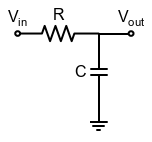

In [3]:
d = schem.Drawing(unit=2.5)
d.add(e.DOT_OPEN, label ='$V_{in}$')
comp1 =d.add(e.RES, d='right',label='$R$') #capacitor
d.add(e.CAP, d='down',label='$C$') # resistor de saída
d.add(e.GND)
#output
d.add(e.LINE, d='right', xy=comp1.end, l=1)
d.add(e.DOT_OPEN,label ='$V_{out}$')
#---
d.draw()

Escrevendo a lei de Kirchhoff para o circuito da figura acima,

$$\frac{dq}{dt}+\frac{1}{\tau}q=\frac{v_{in}(t)}{R}.$$(eq:kvl)

Exploraremos o pacote `sympy` para nos ajudar a resolver esta equação diferencial ordinária.

## Defining **symbols** and equation to be solved

A solução tentantiva será na forma,

$$ q(t)=A \cos(\omega t)+B\sin(\omega t)$$(eq:trial)

In [4]:
A,B,omega,t, tau = symbols('A B omega t tau')
qtrial= A*cos(omega*t)+B*sin(omega*t)

In [5]:
lhs = diff(qtrial,t)+1/tau*qtrial 

In [6]:
v0, R = symbols('v0 R')
rhs = v0/R*cos(omega*t)

In [7]:
eq = lhs-rhs
simplify(lhs)

(A*cos(omega*t) + B*sin(omega*t) + omega*tau*(-A*sin(omega*t) + B*cos(omega*t)))/tau

In [8]:
terms = [sin(omega*t),cos(omega*t)]
eqlhs=collect(simplify(eq),terms)

In [9]:
coefs = [eqlhs.coeff(term) for term in terms]
coefs

[-A*omega + B/tau, A/tau + B*omega - v0/R]

In [10]:
eq2 = [Eq(coef,0) for coef in coefs]
solution, = linsolve(eq2,(A,B))

In [11]:
sol = solution[0]*terms[0] + solution[1]*terms[1]
simplify(sol)

tau*v0*(omega*tau*cos(omega*t) + sin(omega*t))/(R*(omega**2*tau**2 + 1))

In [12]:
print_latex(simplify(sol))

\frac{\tau v_{0} \left(\omega \tau \cos{\left(\omega t \right)} + \sin{\left(\omega t \right)}\right)}{R \left(\omega^{2} \tau^{2} + 1\right)}


Therefore, the solution is:

$$q(t) = \frac{\tau v_{0} \left(\omega \tau \cos{\left(\omega t \right)} + \sin{\left(\omega t \right)}\right)}{R \left(\omega^{2} \tau^{2} + 1\right)}
$$

# Another form....
Equivalently we could solve directly for the electric current $i=dq/dt$, $$\frac{di}{dt}+\frac{1}{\tau}i=\frac{1}{R}\frac{d v_{in}(t)}{dt}$$

In [46]:
i0 ,omega,t, tau, theta = symbols('i0 omega t tau theta')
itrial= i0*cos(omega*t+theta)

In [61]:
lhs = expand_trig(diff(itrial,t)+1/tau*itrial)
lhs

-i0*omega*(sin(theta)*cos(omega*t) + sin(omega*t)*cos(theta)) + i0*(-sin(theta)*sin(omega*t) + cos(theta)*cos(omega*t))/tau

In [56]:
v0, R = symbols('v0 R')
rhs = diff(v0/R*cos(omega*t),t)

In [82]:
eq = lhs-rhs
eq

-i0*omega*(sin(theta)*cos(omega*t) + sin(omega*t)*cos(theta)) + i0*(-sin(theta)*sin(omega*t) + cos(theta)*cos(omega*t))/tau + omega*v0*sin(omega*t)/R

In [88]:
coefs = [expand(eq).coeff(term) for term in terms]
coefs

[-i0*omega*cos(theta) - i0*sin(theta)/tau + omega*v0/R,
 -i0*omega*sin(theta) + i0*cos(theta)/tau]

In [87]:
eq2

[Eq(-i0*omega*cos(theta) - i0*sin(theta)/tau + omega*v0/R, 0),
 Eq(-i0*omega*sin(theta) + i0*cos(theta)/tau, 0)]

In [86]:
eq2 = [Eq(coef,0) for coef in coefs]
solution, = linsolve(eq2,(i0,theta))

NonlinearError: nonlinear term encountered: -i0*omega*cos(theta)

In [36]:
sol = solution[0]*terms[0] + solution[1]*terms[1]
simplify(sol)

omega*tau*v0*(omega*tau*sin(omega*t) - cos(omega*t))/(R*(omega**2*tau**2 + 1))

We can write the solution above in a simpler form by noting 